# TP1: Procesamiento de Imágenes

## Parte 1: Coordenadas Cromáticas y Algoritmo White Patch

### 1. Pasaje a Coordenadas Cromáticas

Las coordenadas cromáticas permiten eliminar las variaciones de contraste en una imagen. La idea es normalizar cada canal de color de la siguiente manera:

\[ I_c'(x, y) = \frac{I_c(x, y)}{I_R(x, y) + I_G(x, y) + I_B(x, y)} \]

Donde \( I_c(x, y) \) es la intensidad en el canal \( c \) (R, G, B) en la posición \((x, y)\).


In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def convert_to_chromatic_coordinates(image):
    sum_channels = np.sum(image, axis=2, keepdims=True)
    chromatic_image = image / (sum_channels + 1e-6)  # Agregar un epsilon para evitar divisiones por cero
    return chromatic_image

input_folder = 'white_patch'
output_folder = 'coord_cromaticas'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        
        chromatic_image = convert_to_chromatic_coordinates(image)
        
        output_path = os.path.join(output_folder, 'chromatic_' + filename)
        cv2.imwrite(output_path, chromatic_image * 255)  # Guardar la imagen normalizada

# 2. Algoritmo White Patch
El siguiente código procesa todas las imágenes en la carpeta /coord_cromaticas usando el algoritmo White Patch.

In [2]:
def white_patch(image):
    max_rgb = np.max(image, axis=(0, 1))
    white_patch_image = (image / max_rgb) * 255
    white_patch_image = np.clip(white_patch_image, 0, 255).astype(np.uint8)
    return white_patch_image

input_folder = 'coord_cromaticas'
output_folder = 'white_patch'

# Creo la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        
        white_patch_img = white_patch(image)
        
        output_path = os.path.join(output_folder, 'white_patch_' + filename)
        cv2.imwrite(output_path, white_patch_img)


# 3. Análisis de Resultados
Después de procesar las imágenes, puedes revisar visualmente los resultados guardados en las carpetas de salida. Considera observar cómo se ven las imágenes procesadas y si notas alguna anomalía o falla en los resultados.

# Parte 2: Histogramas y Segmentación
1. Leer Imágenes img1_tp.png y img2_tp.png en Escala de Grises
El siguiente código carga y muestra todas las imágenes en escala de grises de la carpeta.

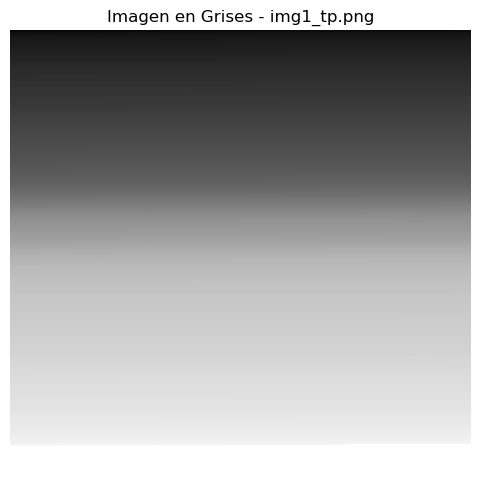

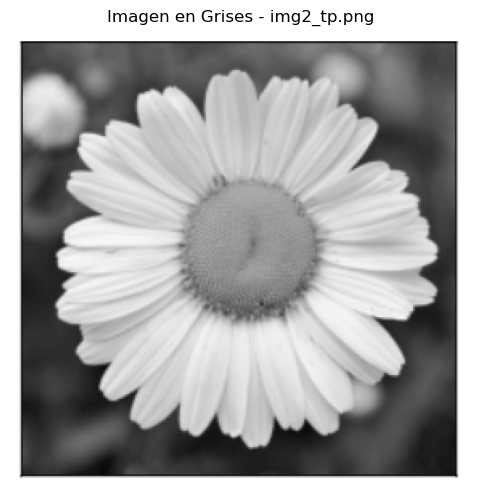

In [3]:
# Lista de imágenes
images = ['img1_tp.png', 'img2_tp.png']

for image_name in images:
    img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    
    # Guardar la imagen en escala de grises
    cv2.imwrite(f'gray_{image_name}', img)
    
    # Mostrar la imagen en escala de grises
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f'Imagen en Grises - {image_name}')
    plt.axis('off')
    plt.show()

## 2. Histogramas
Este código genera y muestra los histogramas para img1_tp.png y img2_tp.png en el notebook o terminal.

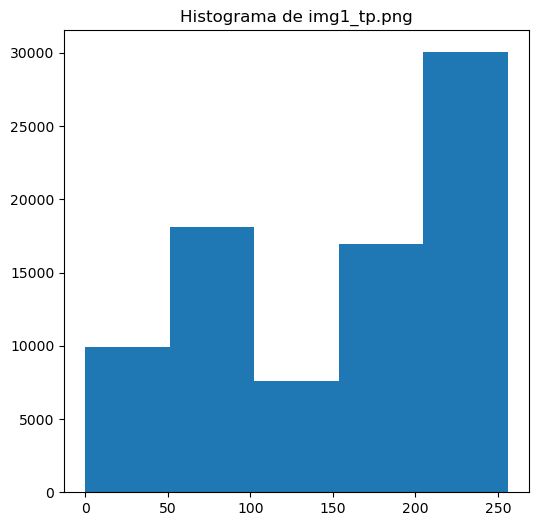

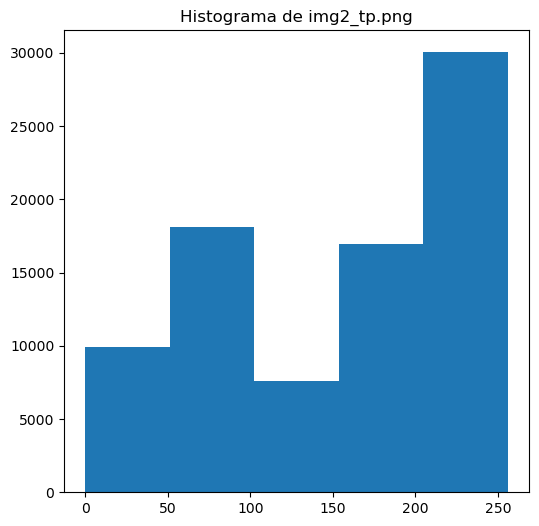

In [4]:
def plot_histogram(image, title):
    plt.figure(figsize=(6, 6))
    plt.hist(image.ravel(), bins=5, range=[0, 256])
    plt.title(title)
    plt.show()

for image_name in images:
    img = cv2.imread(f'gray_{image_name}', cv2.IMREAD_GRAYSCALE)
    
    # Mostrar el histograma
    plot_histogram(img, f'Histograma de {image_name}')


3. Análisis de Resultados
Compara visualmente los histogramas de img1_tp.png y img2_tp.png, y analiza las diferencias o similitudes. Evalúa si los histogramas podrían ser útiles como características (features) para un modelo de clasificación o detección de imágenes.

# 3. Segmentación con Histogramas RGB
Procesa todas las imágenes de segmentacion.png de la carpeta y segmenta los elementos.

In [5]:
input_folder = 'segmentacion'
output_folder = 'segmentacion'

# Crear la carpeta de salida si no existe
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        image_segment = cv2.imread(image_path)

        # Ejemplo básico de segmentación
        lower_sky = np.array([100, 150, 200])
        upper_sky = np.array([130, 180, 255])
        mask_sky = cv2.inRange(image_segment, lower_sky, upper_sky)
        sky_segment = cv2.bitwise_and(image_segment, image_segment, mask=mask_sky)
        
        output_path = os.path.join(output_folder, 'sky_segment_' + filename)
        cv2.imwrite(output_path, sky_segment)
        
        cv2.imshow('Cielo Segmentado', sky_segment)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
